In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [3]:
df=pd.read_csv('happiness_score_dataset.csv')
ds=pd.DataFrame(df)
ds

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
type(ds)

pandas.core.frame.DataFrame

In [5]:
ds.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
ds['Happiness Score'].nunique()

157

In [7]:
ds.loc[df['Happiness Score']==" "]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


There is no blank value are present

# Decoding Country and Region from categorical type to int type

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
list1=['Country','Region']

In [10]:
la=LabelEncoder()
for i in list1:
    ds[i]=la.fit_transform(ds[i].astype(str))

In [11]:
ds

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [12]:
type(ds.Region)

pandas.core.series.Series

# Summary of statistic

In [13]:
ds.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


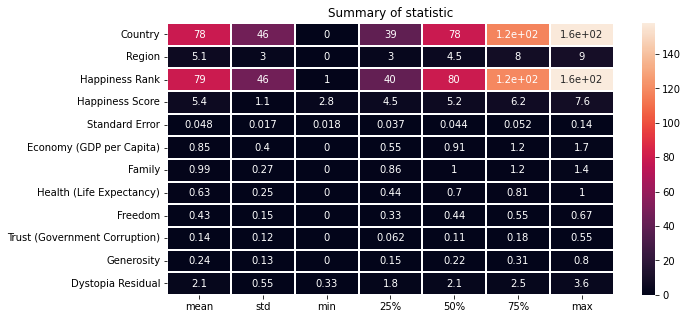

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(ds.describe()[1:].transpose(),annot=True,linewidth=2)
plt.title('Summary of statistic')
plt.savefig('Happiness_heatmap.png')
plt.show()

# To be chcek correlation

In [15]:
ds.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(ds.corr(),annot=True,linewidth=2)
plt.title( 'Check Correlation')
plt.show()

# Uni_Varient Analysis

In [ ]:
col=ds.columns.values
ncol=30
nrows=15
col

In [ ]:
range(len(col))

In [ ]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(len(col)):
    plt.subplot(nrows,ncol,i+1)
    plt.title(i)
    sns.boxplot(data=ds[col[i]],color='red',orient='v')
    plt.tight_layout()

In [ ]:
for i in col:
    plt.figure()
    sns.histplot(data=ds[i])

# Bi_Varient Analysis

In [ ]:
a=df.drop('Happiness Score',axis=1)
b=df['Happiness Score']

In [ ]:
for i in a.columns:
    plt.figure()
    sns.scatterplot(x=b,y=ds[i])

# Removing outliers

In [ ]:
from scipy.stats import zscore

In [ ]:
z=np.abs(zscore(ds))
threshold=3
np.where(z>3)

In [ ]:
ds_new=ds[(z<3).all(axis=1)]
ds_new

In [ ]:
ds.shape

In [ ]:
ds_new.shape

In [ ]:
s=ds_new.drop('Happiness Score',axis=1)

# Removing skewness

In [ ]:
ds_new.skew()

# Remove Multicolinity

In [ ]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calc_vif(s):
    vif=pd.DataFrame()
    vif['variables']=s.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(s.values,i) for i in range(s.shape[1])]
    return(vif)

In [ ]:
calc_vif(s)

In [ ]:
s=ds_new.drop(['Health (Life Expectancy)','Health (Life Expectancy)','Family'],axis=1)

# Remove skewness

In [ ]:
from sklearn.preprocessing import power_transform

In [ ]:
a=power_transform(s,method='yeo-johnson')

# Change into same scale

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st=StandardScaler()

In [ ]:
x=st.fit_transform(a)
x

In [ ]:
x.shape

#  TARGET VALUE=Happiness Score

In [ ]:
y=ds_new['Happiness Score']
y.shape

In [ ]:
li=LinearRegression()

In [ ]:
for i in range(0,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    li.fit(x_train,y_train)
    pred_train=li.predict(x_train)
    pred_test=li.predict(x_test)
    print(f"At random state {i},the training score is:{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing score is: {r2_score(y_test,pred_test)}")
    print("\n")

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)
li.fit(x_train,y_train)
pred_score=li.predict(x_test)
pred_train-li.predict(x_train)
print(f"Mean_absolute_error is:{mean_absolute_error(y_test,pred_score)}")
print(f"Mean_squared_error is:{mean_squared_error(y_test,pred_score)}")
print(f"Accuracy_score is:{r2_score(y_test,pred_score)}")
print(f"The score of model is:{li.score(x_train,y_train)}")

In [ ]:
dtc=DecisionTreeRegressor()

In [ ]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_score) 
for j in range(2,10):
    cv_score=cross_val_score(li,x,y,cv=j)
    mean_score=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold {j} the mean_score is:{mean_score} and the training accuracy is {train_accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

Cv=3 give best result but it is not better than LINEAR REGRESSION

# Regulization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [ ]:
dict1={'alpha':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(0,10))}

In [ ]:
ls=Lasso()
rd=Ridge()

# Laaso Regression

In [ ]:
gd=GridSearchCV(estimator=ls,param_grid=dict1)
gd.fit(x_train,y_train)
print(gd.best_params_)
print(gd.best_score_)

In [ ]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print(f"Mean_absolute_error is:{mean_absolute_error(y_test,pred_ls)}")
print(f"Mean_squared_error is:{mean_squared_error(y_test,pred_ls)}")
print(f"Accuracy_score is:{r2_score(y_test,pred_ls)}")
print(f"The score of Happiness is:{ls.score(x_train,y_train)}")

Here alpha=0.001 give less result than compare to alpha=0.0001, so we take alpha=0.0001 for more accurate result

# Ridge Regression

In [ ]:
gr=GridSearchCV(estimator=rd,param_grid=dict1)
gr.fit(x_train,y_train)
print(gr.best_params_)
print(gr.best_score_)

In [ ]:
rd=Lasso(alpha=0.0001,random_state=0)
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
print(f"Mean_absolute_error is:{mean_absolute_error(y_test,pred_rd)}")
print(f"Mean_squared_error is:{mean_squared_error(y_test,pred_rd)}")
print(f"Accuracy_score is:{r2_score(y_test,pred_rd)}")
print(f"The score of Happiness is:{ls.score(x_train,y_train)}")

Here alpha=1 give less result than compare to alpha=0.0001, so we take alpha=0.0001 for more accurate result

# Ensemble Technique

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dic={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
grd=GridSearchCV(estimator=rf,param_grid=dic)
grd.fit(x_train,y_train)
print(grd.best_params_)
print(grd.best_score_)

In [ ]:
rf=RandomForestRegressor(criterion='mse',max_features='log2')           #(100<---default) and also work(n_estimate=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(f"Mean_absolute_error is:{mean_absolute_error(y_test,predrf)}")
print(f"Mean_squared_error is:{mean_squared_error(y_test,predrf)}")
print(f"Accuracy_score is:{r2_score(y_test,predrf)}")
print(f"The score of Happiness is:{rf.score(x_train,y_train)}")

# Cnclusion-We get maximum score is 99.92% by linear regression 